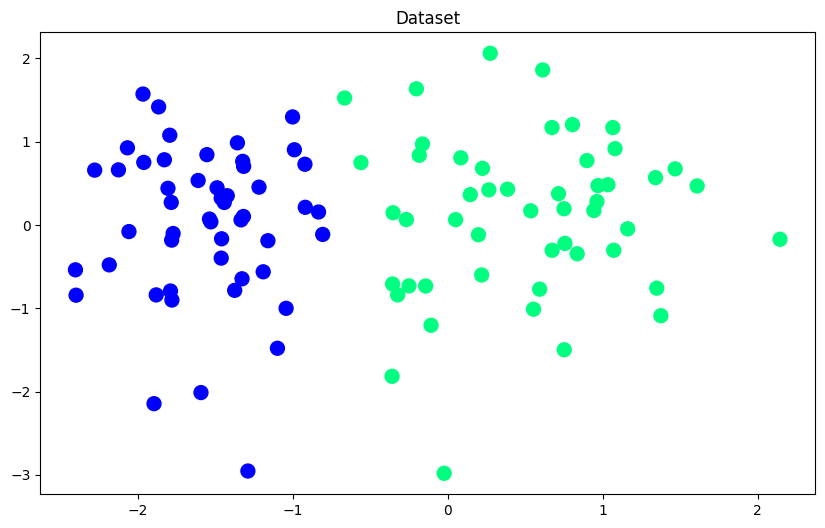

Weights: [ 4.3545691  -0.02149747]
Intercept: 2.835054943286558


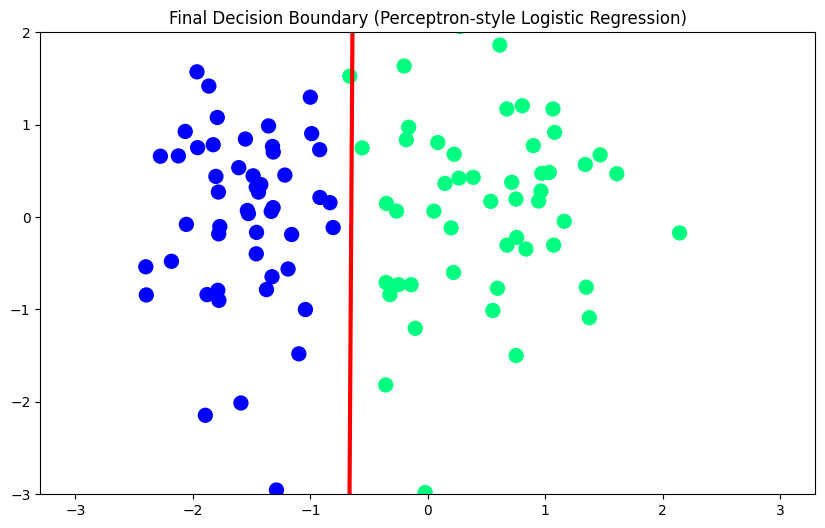

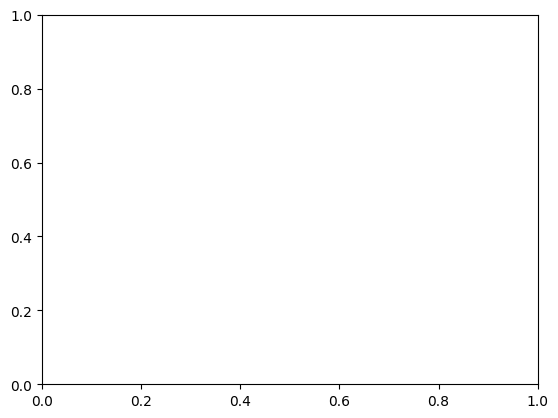

In [6]:
# ==============================
# IMPORTS
# ==============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LogisticRegression


# ==============================
# DATA GENERATION
# ==============================
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=1, n_redundant=0,
    n_classes=2, n_clusters_per_class=1, random_state=41,
    hypercube=False, class_sep=10
)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.title("Dataset")
plt.show()


# ==============================
# HELPER FUNCTIONS
# ==============================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_loss(X, y, weights):
    Xb = np.insert(X, 0, 1, axis=1)
    y_hat = sigmoid(Xb @ weights)
    eps = 1e-9
    loss = -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    return loss


# ==============================
# PERCEPTRON-LIKE LOGISTIC REGRESSION
# ==============================
def perceptron_weights(X, y):
    """Returns final weights after training (for drawing static boundary)."""
    Xb = np.insert(X, 0, 1, axis=1)
    weights = np.ones(Xb.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, len(X))
        y_hat = sigmoid(np.dot(Xb[j], weights))
        weights = weights + lr * (y[j] - y_hat) * Xb[j]

    return weights[0], weights[1:]


intercept_, coef_ = perceptron_weights(X, y)
print("Weights:", coef_)
print("Intercept:", intercept_)

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Plot final perceptron result
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.title("Final Decision Boundary (Perceptron-style Logistic Regression)")
plt.show()


# ==============================
# ANIMATION OF DECISION BOUNDARY UPDATES
# ==============================
def perceptron_animation(X, y):
    m_vals = []
    b_vals = []

    Xb = np.insert(X, 0, 1, axis=1)
    weights = np.ones(Xb.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0, len(X))
        y_hat = sigmoid(np.dot(Xb[j], weights))
        weights = weights + lr * (y[j] - y_hat) * Xb[j]

        m_vals.append(-(weights[1] / weights[2]))
        b_vals.append(-(weights[0] / weights[2]))

    return m_vals, b_vals


m_vals, b_vals = perceptron_animation(X, y)

fig, ax = plt.subplots()
